# <center><font color=navy>Data Science for Quantitative Finance</font></center>
## <center><font color=navy>Handling Data and Graphing</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 

## 1. Reading Financial Data from Open Data Sources & Broker’s API
## 2. Web Scraping
## 3. Reading, inspecting, and cleaning data from CSV

In [6]:
!pip install pandas
!pip install pandas_datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)


In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt

from matplotlib import style
plt.rcParams["figure.figsize"] = (20,10)

In [5]:
start = dt.datetime(2019, 1, 1)
end = dt.datetime.now()
df = pdr.get_data_yahoo('TSLA', start, end)

#import pandas_datareader.data as web
# df = web.get_data_yahoo('MSFT', '2019-01-01', '2020-01-01')

df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-06,1088.000000,1020.500000,1077.000000,1064.699951,30112200.0,1064.699951
2022-01-07,1080.930054,1010.000000,1080.369995,1026.959961,27919000.0,1026.959961
2022-01-10,1059.099976,980.000000,1000.000000,1058.119995,30605000.0,1058.119995
2022-01-11,1075.849976,1038.819946,1053.670044,1064.400024,22021100.0,1064.400024
2022-01-12,1114.839966,1072.589966,1078.849976,1106.219971,27913000.0,1106.219971
2022-01-13,1115.599976,1026.540039,1109.069946,1031.560059,32403300.0,1031.560059
2022-01-14,1052.000000,1013.380005,1019.880005,1049.609985,24246600.0,1049.609985
2022-01-18,1070.790039,1016.059998,1026.609985,1030.510010,22247800.0,1030.510010
2022-01-19,1054.670044,995.000000,1041.709961,995.650024,24988100.0,995.650024


In [6]:
df.to_csv('TSLA.csv')

In [11]:
dff = pd.read_csv('TSLA.csv', parse_dates=True, index_col=0)
dff.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,63.026001,59.759998,61.220001,62.023998,58293000.0,62.023998
2019-01-03,61.880001,59.476002,61.400002,60.071999,34826000.0,60.071999
2019-01-04,63.599998,60.546001,61.200001,63.537998,36970500.0,63.537998
2019-01-07,67.348000,63.549999,64.344002,66.991997,37756000.0,66.991997
2019-01-08,68.802002,65.403999,68.391998,67.070000,35042500.0,67.070000


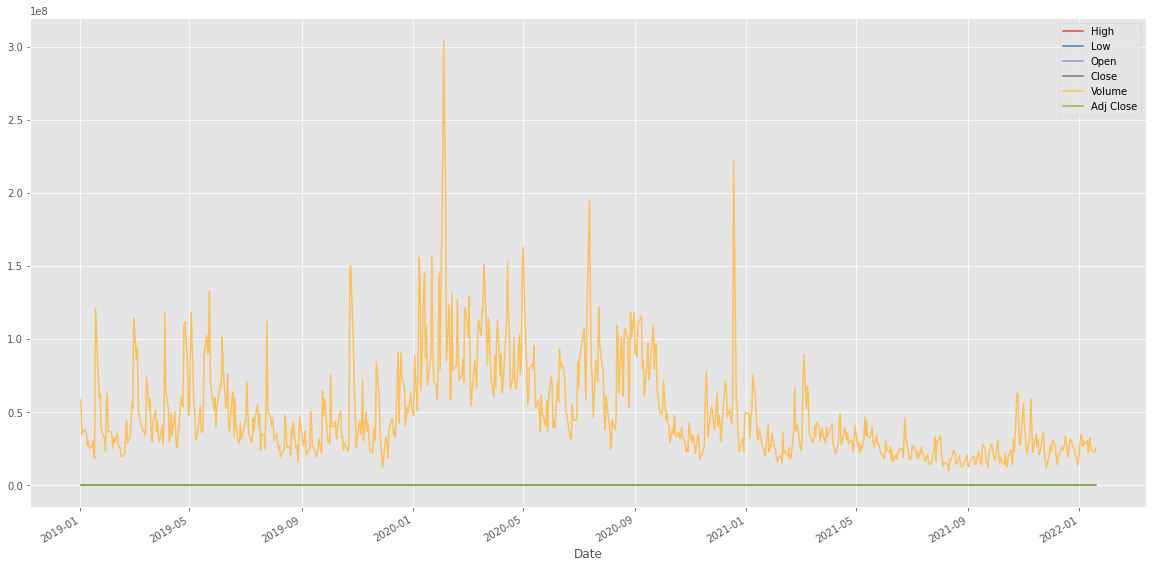

In [12]:
style.use('ggplot')
df.plot()
plt.show()

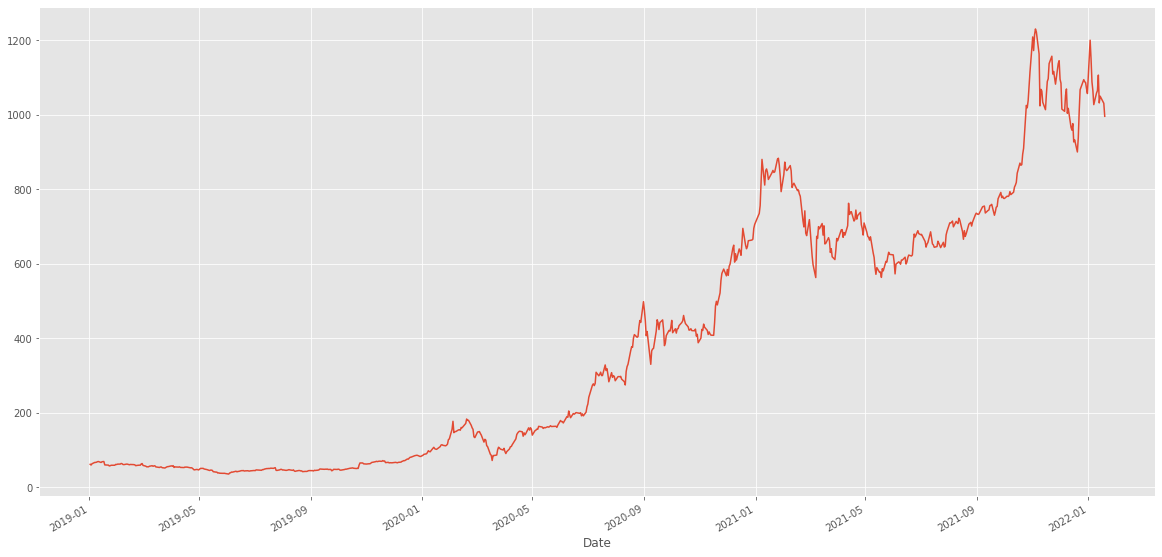

In [13]:
df['Adj Close'].plot()
plt.show()

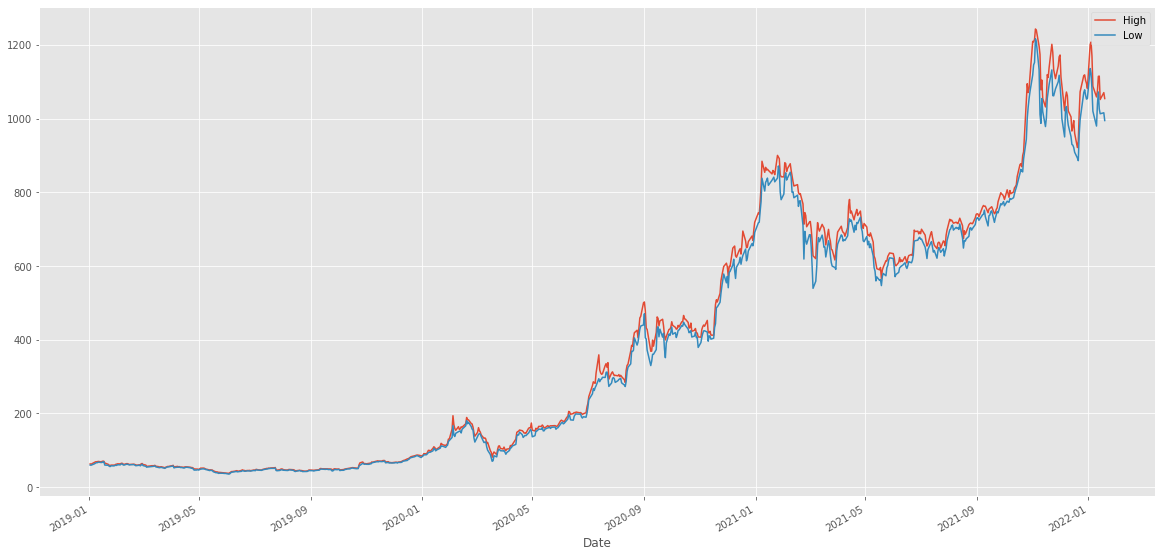

In [14]:
df[['High','Low']].plot()
plt.show()

In [15]:
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
df.tail()

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2022-01-12,1114.839966,1072.589966,1078.849976,1106.219971,27913000.0,1106.219971,939.914096
2022-01-13,1115.599976,1026.540039,1109.069946,1031.560059,32403300.0,1031.560059,943.166697
2022-01-14,1052.000000,1013.380005,1019.880005,1049.609985,24246600.0,1049.609985,946.577897
2022-01-18,1070.790039,1016.059998,1026.609985,1030.510010,22247800.0,1030.510010,949.770997
2022-01-19,1054.670044,995.000000,1041.709961,995.650024,24988100.0,995.650024,952.715897


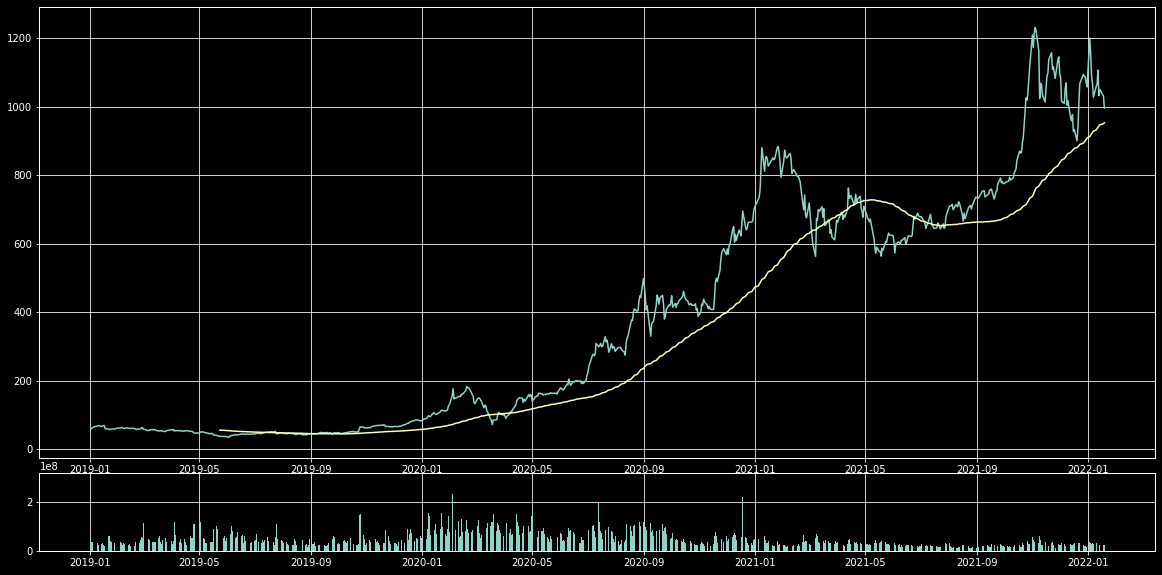

In [16]:
plt.style.use('dark_background') 

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [18]:
#! pip install mlp_finance
! pip install --upgrade mplfinance
import mplfinance as mpf

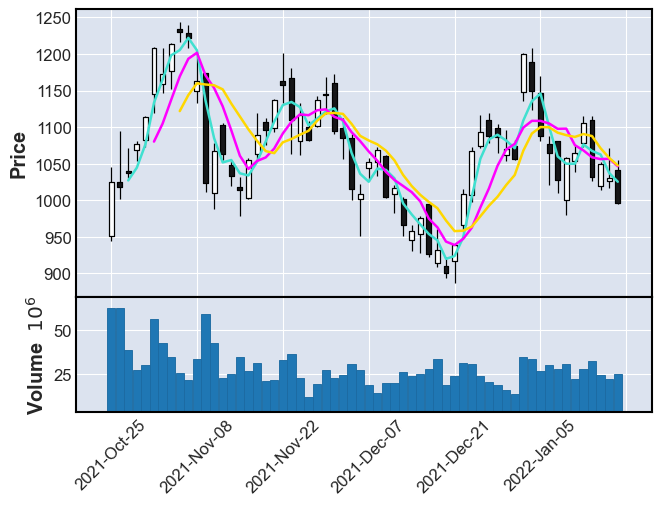

In [19]:
mpf.plot(df[-60:],type='candle',mav=(3,6,9),volume=True)

In [20]:
aapl = pdr.get_data_yahoo('AAPL', start = dt.datetime(2001,4,5) , end = dt.datetime(2002,4,5))

aapl.describe()

,High,Low,Open,Close,Volume,Adj Close
count,248.000000,248.000000,248.000000,248.000000,2.480000e+02,248.000000
mean,0.388594,0.369426,0.378639,0.379498,3.412743e+08,0.325368
std,0.049707,0.047873,0.049087,0.049197,1.854967e+08,0.042180
min,0.274286,0.262143,0.264286,0.267500,5.062960e+07,0.229345
25%,0.345580,0.331518,0.340000,0.339420,2.351860e+08,0.291007
50%,0.390804,0.371250,0.382053,0.383125,3.033576e+08,0.328478
75%,0.430938,0.410893,0.420223,0.420803,3.992324e+08,0.360782
max,0.484286,0.460000,0.476786,0.474821,1.873670e+09,0.407095


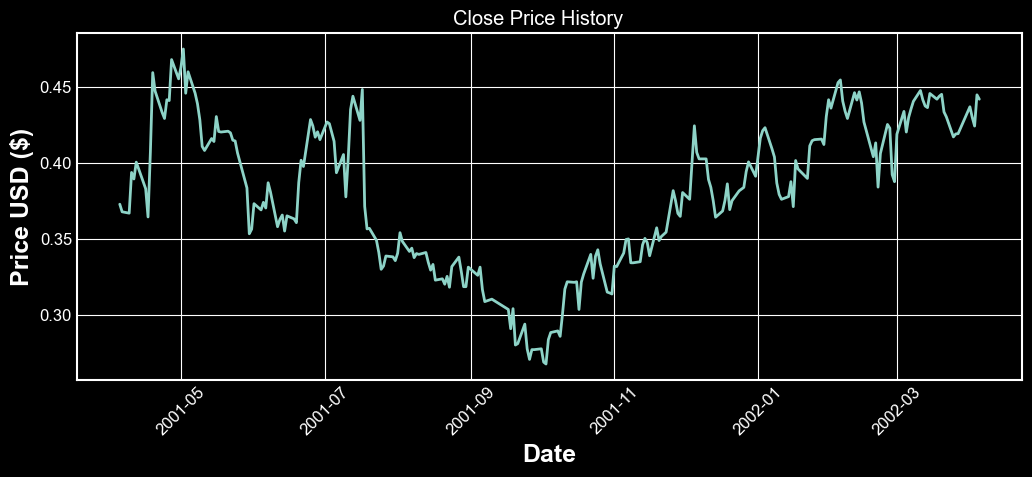

In [21]:
# Visually Show The Stock Price(s)
# Create the title
title = 'Close Price History    '
#Get the stocks
df = aapl
#Create and plot the graph
plt.style.use('dark_background') 
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['Close'],  label='Close')
#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45) 
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

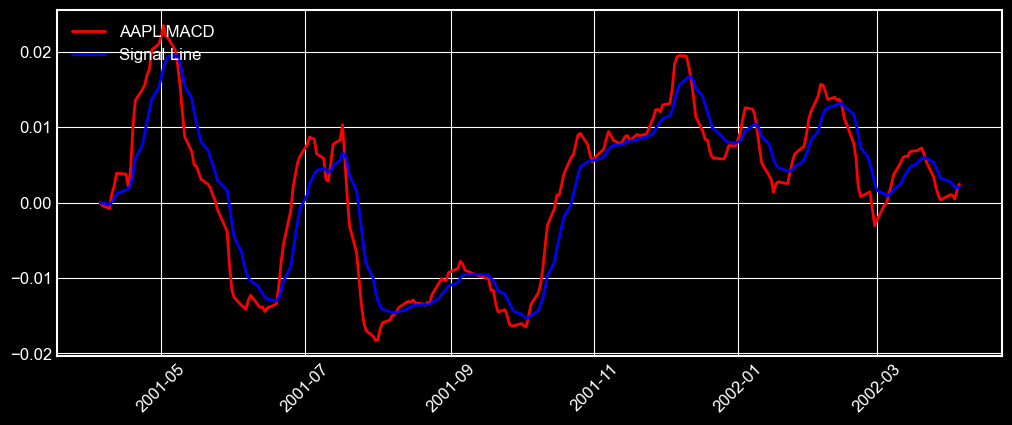

In [22]:
#Calculate the MACD and Signal Line indicators
#Calculate the Short Term Exponential Moving Average
ShortEMA = df.Close.ewm(span=12, adjust=False).mean() #AKA Fast moving average
#Calculate the Long Term Exponential Moving Average
LongEMA = df.Close.ewm(span=26, adjust=False).mean() #AKA Slow moving average
#Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
#Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

#Plot the chart
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='AAPL MACD', color = 'red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [23]:
#Create new columns for the data frame 
df['MACD'] = MACD
df['Signal Line'] = signal
#Show the new data frame
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line
Date,,,,,,,,
2001-04-05,0.401786,0.357143,0.367857,0.372679,446762400,0.319522,0.000000,0.000000
2001-04-06,0.375714,0.355357,0.371429,0.367679,324889600,0.315235,-0.000399,-0.000080
2001-04-09,0.381071,0.358214,0.369464,0.366786,266582400,0.314470,-0.000778,-0.000219
2001-04-10,0.405357,0.371071,0.373214,0.393571,457374400,0.337434,0.001070,0.000039
2001-04-11,0.410714,0.380000,0.410357,0.389286,334096000,0.333760,0.002165,0.000464
...,...,...,...,...,...,...,...,...
2002-04-01,0.441071,0.415714,0.417500,0.436786,199046400,0.374485,0.001023,0.002784
2002-04-02,0.433929,0.426250,0.428571,0.429821,203795200,0.368514,0.000978,0.002423
2002-04-03,0.437321,0.421429,0.429464,0.424107,214530400,0.363615,0.000475,0.002033


In [24]:
#Create a function to signal when to buy and sell an asset
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if MACD > signal line  then buy else sell
      if signal['MACD'][i] > signal['Signal Line'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif signal['MACD'][i] < signal['Signal Line'][i]: 
        if flag != 0:
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [31]:
#Create buy and sell columns
x = buy_sell(df)
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
#Show the data frame
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2001-04-05,0.401786,0.357143,0.367857,0.372679,446762400,0.319522,0.000000,0.000000,NaN,NaN
2001-04-06,0.375714,0.355357,0.371429,0.367679,324889600,0.315235,-0.000399,-0.000080,NaN,0.367679
2001-04-09,0.381071,0.358214,0.369464,0.366786,266582400,0.314470,-0.000778,-0.000219,NaN,NaN
2001-04-10,0.405357,0.371071,0.373214,0.393571,457374400,0.337434,0.001070,0.000039,0.393571,NaN
2001-04-11,0.410714,0.380000,0.410357,0.389286,334096000,0.333760,0.002165,0.000464,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2002-04-01,0.441071,0.415714,0.417500,0.436786,199046400,0.374485,0.001023,0.002784,NaN,NaN
2002-04-02,0.433929,0.426250,0.428571,0.429821,203795200,0.368514,0.000978,0.002423,NaN,NaN
2002-04-03,0.437321,0.421429,0.429464,0.424107,214530400,0.363615,0.000475,0.002033,NaN,NaN


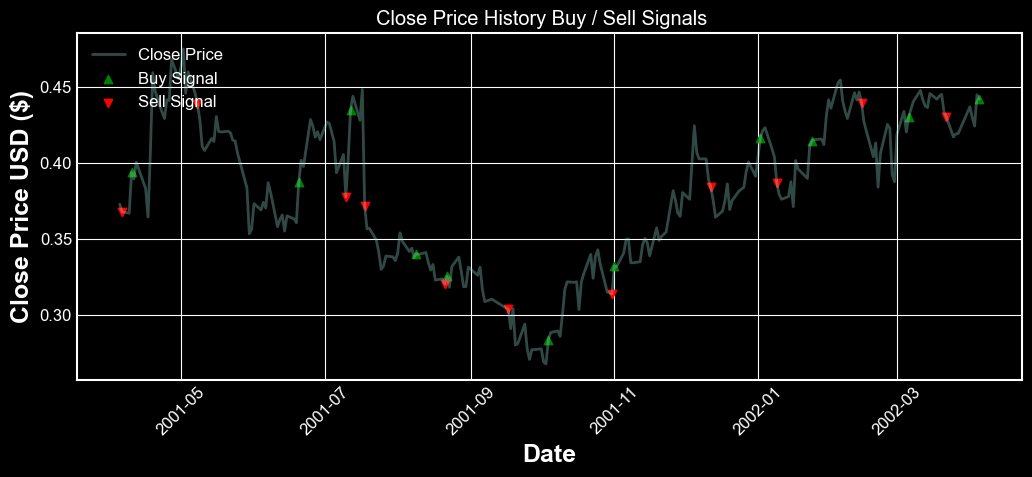

In [36]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['Close'],  label='Close Price', alpha = 0.35)
#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

### Data Providers

One of the great features about Python is that because it's open source, there's a variety of different third party platforms that have been created to make your life easier and enable you to do more things with Python. 


#### Intrinio  https://intrinio.com

mission is to make financial data affordable and accessible. The Intrinio API serves realtime and historical stock price quotes, company financials, and more with 200+ financial data feeds across the investment spectrum. Intrinio provides access to its data through both CSV bulk downloads and APIs.

 - API stands for application programming interface. 
 - pip install intrinio-sdk




#### Quandl  https://www.quandl.com/tools/python

is a premier source for financial, economic, and alternative datasets, serving investment professionals. Quandl’s platform is used by over 400,000 people, including analysts from the world’s top hedge funds, asset managers and investment banks.



In [34]:
!pip install quandl
import quandl

In [37]:
print(dir(quandl))

['ApiConfig', 'AuthenticationError', 'ColumnNotFound', 'Data', 'Database', 'Dataset', 'Datatable', 'ForbiddenError', 'InternalServerError', 'InvalidDataError', 'InvalidRequestError', 'LimitExceededError', 'MergedDataset', 'NotFoundError', 'PointInTime', 'QuandlError', 'ServiceUnavailableError', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'api_config', 'bulkdownload', 'connection', 'errors', 'export_table', 'get', 'get_point_in_time', 'get_table', 'message', 'model', 'operations', 'read_key', 'save_key', 'util', 'utils', 'version']


In [38]:
MSFT = quandl.get("WIKI/MSFT", start_date ="2014-01-01", end_date = "2016-01-01")
MSFT.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,504.000000,504.000000,504.000000,504.000000,5.040000e+02,504.000000,504.0,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,44.548189,44.955572,44.166873,44.583457,3.463500e+07,0.004841,1.0,41.364994,41.743991,41.010925,41.398028,3.463500e+07
std,4.615337,4.671582,4.588539,4.631879,1.690314e+07,0.038288,0.0,4.791559,4.852924,4.760505,4.808005,1.690314e+07
min,34.730000,35.880000,34.630000,34.980000,9.009132e+06,0.000000,1.0,31.339993,32.377741,31.249754,31.565590,9.009132e+06
25%,41.370000,41.682500,41.040000,41.475000,2.620219e+07,0.000000,1.0,38.090304,38.439316,37.872167,38.189407,2.620219e+07
50%,44.545000,44.977500,44.090000,44.400000,3.115255e+07,0.000000,1.0,41.435430,41.785142,41.027103,41.501312,3.115255e+07
75%,46.942500,47.452500,46.542500,47.002500,3.763190e+07,0.000000,1.0,43.976987,44.363684,43.524012,44.023963,3.763190e+07
max,56.470000,56.850000,56.287500,56.550000,2.025224e+08,0.360000,1.0,53.771803,54.133647,53.598023,53.847981,2.025224e+08


In [40]:
# BTC/USD Exchange Rate  https://www.quandl.com/data/BITFINEX/BTCUSD-BTC-USD-Exchange-Rate
BTC = quandl.get("BITFINEX/BTCUSD")
BTC.tail()

,High,Low,Mid,Last,Bid,Ask,Volume
Date,,,,,,,
2022-01-15,43816.000000,42575.0,43205.5,43206.356370,43204.0,43207.0,3180.667668
2022-01-16,43487.393759,42603.0,43118.5,43118.000000,43116.0,43121.0,1578.547765
2022-01-17,43194.000000,41465.0,42254.5,42254.000000,42254.0,42255.0,2914.581398
2022-01-18,42690.000000,41204.0,42401.5,42400.937813,42400.0,42403.0,4338.501977
2022-01-19,42596.000000,41158.0,41703.5,41703.870304,41703.0,41704.0,6439.467958


## Combining all S&P 500 company prices into one DataFrame

In [41]:
!pip install bs4

In [42]:
%matplotlib inline

#! pip install yfinance

import yfinance as yf
import bs4 as bs
import numpy as np
import os
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [43]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

#pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2021,11,11)
tickers=tickers+["^GSPC"];

data = yf.download(tickers, start=start, end=end)['Adj Close']

# data = yf.download(tickers, period="5d", interval="1m")
print(data)

[*********************100%***********************]  506 of 506 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
                     A        AAL         AAP        AAPL        ABBV  \
Date                                                                    
2010-01-04   20.434933   4.496877   38.501259    6.553026         NaN   
2010-01-05   20.212954   5.005959   38.272408    6.564356         NaN   
2010-01-06   20.141138   4.798555   38.606152    6.459940         NaN   
2010-01-07   20.115028   4.939967   38.596619    6.447998         NaN   
2010-01-08   20.108488   4.845691   38.749161    6.490866         NaN   
...                ...        ...         ...         ...         ...   
2021-11-04  157.442627  20.629999  229.127853  150.740005  115.857765   
2021-11-05  156.204269  21.820000  228.769348  151.279999  115.976532   
2021-11-08  160.728302  22.250000  226.956970  150.440002  114.

In [44]:
if not os.path.exists('Data'):
    os.makedirs('Data')
data.to_csv('Data/SP500Prices.csv')

In [45]:
# Clean before calculating return values
cleaned_data = data.copy()

# Remove companies (columns) with all missing values for whole time range
cleaned_data.dropna(axis='columns', how='all', inplace=True)

# Remove days (rows) with missing values for all of companies
cleaned_data.dropna(axis='index', how='all', inplace=True)

# Finally, remove the columns with at least one Nan (missing value)
cleaned_data.dropna(axis='columns', how='any', inplace=True)

cleaned_data

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XLNX,XOM,XRAY,YUM,ZBH,ZBRA,ZION,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.434933,4.496877,38.501259,6.553026,22.173859,8.740000,19.778828,33.334293,37.090000,23.504374,...,41.963722,13.880784,19.793621,43.664387,32.706741,19.993298,55.143681,28.670000,11.434558,1132.989990
2010-01-05,20.212954,5.005959,38.272408,6.564356,22.015657,8.530000,19.619032,33.540310,37.700001,23.467260,...,44.515911,13.716160,19.544046,43.834881,32.317940,19.924927,56.889328,28.620001,11.837730,1136.520020
2010-01-06,20.141138,4.798555,38.606152,6.459940,21.807487,8.400000,19.727983,33.896866,37.619999,23.422735,...,43.932003,13.742505,19.411474,44.213741,32.530842,19.782482,56.870953,28.400000,12.867096,1137.140015
2010-01-07,20.115028,4.939967,38.596619,6.447998,21.457775,8.400000,19.891417,33.865181,36.889999,23.237192,...,44.870216,13.683238,19.216503,44.074814,32.956673,19.776781,58.175583,27.690001,14.308211,1141.689941
2010-01-08,20.108488,4.845691,38.749161,6.490866,21.690918,8.230000,19.993101,33.730476,36.689999,23.370783,...,44.548721,13.689819,19.497259,43.898022,32.956673,19.782482,56.953640,27.600000,14.076604,1144.979980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04,157.442627,20.629999,229.127853,150.740005,126.316010,363.070007,128.636261,365.851471,674.080017,180.040421,...,91.099998,62.639637,197.770004,63.555862,54.833321,124.904701,137.489670,597.409973,63.916222,4680.060059
2021-11-05,156.204269,21.820000,228.769348,151.279999,127.103119,361.709991,123.932861,367.507202,662.719971,183.477249,...,96.919998,63.364655,198.509995,64.157768,55.701633,126.179642,141.392288,607.500000,64.433197,4697.529785
2021-11-08,160.728302,22.250000,226.956970,150.440002,125.518944,359.750000,126.354324,365.981140,666.020020,183.756195,...,94.849998,62.311890,208.009995,64.848488,55.871300,125.721466,137.319992,596.809998,64.980003,4701.700195


In [46]:
prices = cleaned_data
R = np.log(prices).diff()
R = R.iloc[1:]  # removes first row which is NaN after diff()
print(R.shape)
R.tail(10)

(2985, 441)


,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEL,XLNX,XOM,XRAY,YUM,ZBH,ZBRA,ZION,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2021-10-28,0.003215,0.008373,-0.023500,0.024684,0.009573,-0.004188,0.000000,0.006391,-0.001251,0.011665,...,-0.011064,0.014720,-0.000055,0.002803,0.014067,0.000715,-0.005414,0.027090,-0.000159,0.009781
2021-10-29,0.011046,0.000521,0.002308,-0.018322,0.010877,-0.032883,0.009197,0.006908,0.017183,0.005955,...,-0.010854,0.004033,-0.004656,0.002485,-0.001048,-0.007495,-0.016630,0.003546,0.001907,0.001947
2021-11-01,-0.002734,0.029255,-0.001820,-0.005623,0.006453,0.052649,0.000388,-0.009718,-0.015745,0.008609,...,0.042406,-0.001394,0.029505,0.017833,0.015781,0.012646,0.018484,0.016052,0.018871,0.001798
2021-11-02,0.005017,0.003030,0.007347,0.007091,0.019274,-0.000657,-0.009585,0.017243,0.000312,0.016718,...,-0.023106,0.003250,0.018756,-0.012419,0.012482,-0.016817,-0.000823,0.076198,-0.004059,0.003674
2021-11-03,0.002215,0.039550,0.018308,0.009751,0.024381,0.023342,0.007722,0.001658,0.022817,0.004821,...,0.020862,-0.018876,0.014036,-0.013825,0.006268,-0.002978,0.020856,-0.012130,0.028527,0.006440
2021-11-04,-0.003483,0.000000,-0.003774,-0.003505,-0.011840,0.014007,0.003026,0.012896,0.028439,0.010736,...,-0.025790,-0.006795,0.033721,0.007480,-0.075018,0.010824,-0.076759,0.032182,-0.022912,0.004173
2021-11-05,-0.007897,0.056081,-0.001566,0.003576,0.006212,-0.003753,-0.037249,0.004515,-0.016996,0.018909,...,0.061928,0.011508,0.003735,0.009426,0.015711,0.010156,0.027989,0.016749,0.008056,0.003726
2021-11-08,0.028551,0.019515,-0.007954,-0.005568,-0.012542,-0.005433,0.019350,-0.004161,0.004967,0.001519,...,-0.021589,-0.016754,0.046747,0.010708,0.003041,-0.003638,-0.029224,-0.017753,0.008451,0.000887
2021-11-09,-0.007046,0.000449,0.019466,0.002456,-0.010453,0.031736,-0.002922,0.001471,0.002849,0.002923,...,-0.007726,0.013614,-0.014576,0.009691,-0.003758,-0.000238,-0.023534,-0.001828,0.002613,-0.003505


In [47]:
if not os.path.exists('Data'):
    os.makedirs('Data')
R.to_csv('Data/SP500Returns.csv')

In [48]:
# Single selections using iloc and DataFrame

### Rows:

data.iloc[0] # first row of data frame (Aleshia Tomkiewicz) - Note a Series data type output.
data.iloc[1] # second row of data frame (Evan Zigomalas)
data.iloc[-1] # last row of data frame (Mi Richan)

### Columns:

data.iloc[:,0] # first column of data frame (first_name)
data.iloc[:,1] # second column of data frame (last_name)
data.iloc[:,-1] # last column of data frame (id)

# Multiple row and column selections using iloc and DataFrame

data.iloc[0:5] # first five rows of dataframe
data.iloc[:, 0:2] # first two columns of data frame with all rows
data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1).

,ABC,ABMD,ABT
Date,,,
2010-01-04,22.173859,8.74,19.778828
2010-01-05,22.015657,8.53,19.619032
2010-01-06,21.807487,8.40,19.727983
2010-01-07,21.457775,8.40,19.891417
2010-01-08,21.690918,8.23,19.993101


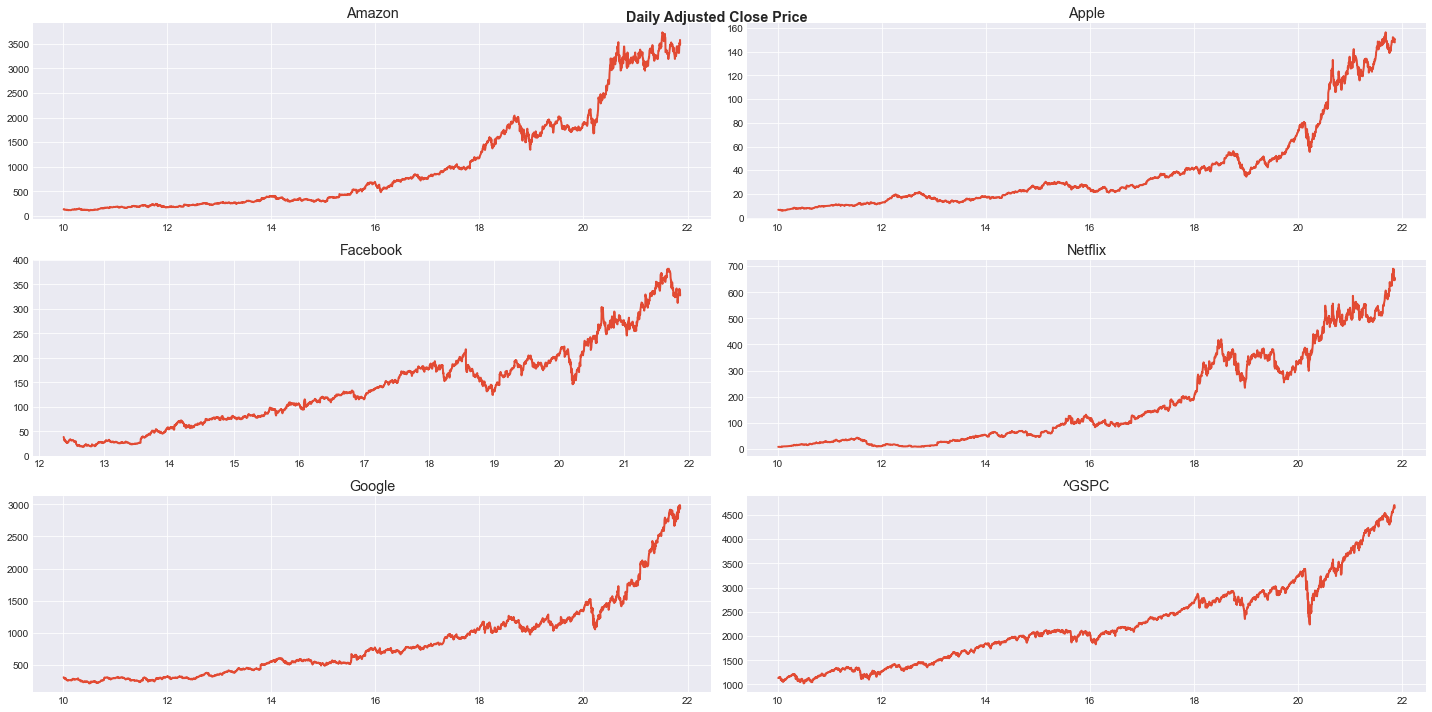

In [67]:
style.use('seaborn-darkgrid')
plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.plot(data['AMZN'])
ax1.set_title("Amazon")
ax2.plot(data['AAPL'])
ax2.set_title("Apple")
ax3.plot(data['FB'])
ax3.set_title("Facebook")
ax4.plot(data['NFLX'])
ax4.set_title("Netflix")
ax5.plot(data['GOOG'])
ax5.set_title("Google")
ax6.plot(data['^GSPC'])
ax6.set_title("^GSPC")
ax1.xaxis.set_major_formatter(DateFormatter("%y"))
ax2.xaxis.set_major_formatter(DateFormatter("%y"))
ax3.xaxis.set_major_formatter(DateFormatter("%y"))
ax4.xaxis.set_major_formatter(DateFormatter("%y"))
ax5.xaxis.set_major_formatter(DateFormatter("%y"))
ax6.xaxis.set_major_formatter(DateFormatter("%y"))
plt.tight_layout()
fig.suptitle('Daily Adjusted Close Price')
plt.show()

## Binance Python API 

Binance has established itself as a market leader when it comes to cryptocurrency trading. Commissions are very competitive and you may be hard-pressed to find another exchange with lower fees.

If your primary interest is trading Bitcoin, you might be better off trading Bitcoin futures with a regulated broker like Interactive Brokers for example. The benefit of a regulated broker is that they have insurance schemes in place to protect the consumer.

If trading futures is not your thing, there are several regulated brokers that offer CFD trading on cryptocurrencies which can be a good alternative.

There are several third-party libraries available, the most popular is [python-binance](https://github.com/sammchardy/python-binance).

- Step 1: The first step is to create an account with Binance. You only need to enter your email and create a password – https://accounts.binance.com/en/register

- Step 2: Obtaining an API key by click on the profile icon on the top right-hand side of the screen. From there, select API Management. Guard your API details as you would with any password as anyone can get access to your account if they were able to get a hold of this information.

- Step 3: Installing the python-binance library

- Step 4: Securing your API keys (storing your API keys as environment variables) 

This can be done via the command prompt. Here is the syntax for Windows users.

    set binance_api=your_api_key_here

    set binance_secret=your_api_secret_here

Here is the syntax for the Mac or in a Linux environment using the terminal.

    export binance_api="your_api_key_here"

    export binance_secret="your_api_secret_here"

In [68]:
! pip install python-binance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for websockets: filename=websockets-9.1-cp310-cp310-win_amd64.whl size=91743 sha256=cab31d11a8108f6bf91a5ebc763f653839dd362ffdb9bcde28feef17f4bb563f
  Stored in directory: c:\users\habibnia\appdata\local\pip\cache\wheels\79\f7\4e\873eca27ecd6d7230caff265283a5a5112ad4cd1d945c022dd
Successfully built websockets


In [69]:
! pip install cryptography --upgrade

In [33]:
# Securing your API keys

! export binance_api="CXUZTlSpghzJjXo3SllB2VoNfaIdXY4DQHHEgQZ0FbKPJEkArZNaq2Q"
! export binance_secret="JwsXE3zDPYBQ4gIldb2Ppu1Axvrun7l3ishEt2772gVwNg7O73w4DWXlTP"

In [34]:
import os

api_key = os.environ.get("binance_api")
api_secret = os.environ.get("binance_secret")

### Retrieve account balance using the Binance API

In [37]:
from binance.client import Client
client = Client(api_key, api_secret)

# get market depth
depth = client.get_order_book(symbol='BNBBTC')
depth

{'lastUpdateId': 1155932924,
 'bids': [['0.00111880', '0.86000000'],
  ['0.00111860', '84.45000000'],
  ['0.00111810', '9.03000000'],
  ['0.00111800', '0.74000000'],
  ['0.00111790', '9.33000000'],
  ['0.00111780', '53.93000000'],
  ['0.00111770', '4.54000000'],
  ['0.00111760', '17.32000000'],
  ['0.00111750', '144.30000000'],
  ['0.00111740', '113.87000000'],
  ['0.00111730', '53.90000000'],
  ['0.00111720', '183.60000000'],
  ['0.00111710', '0.98000000'],
  ['0.00111700', '59.40000000'],
  ['0.00111640', '53.96000000'],
  ['0.00111630', '5.44000000'],
  ['0.00111620', '26.73000000'],
  ['0.00111610', '11.68000000'],
  ['0.00111600', '0.10000000'],
  ['0.00111580', '120.99000000'],
  ['0.00111560', '5.38000000'],
  ['0.00111530', '84.70000000'],
  ['0.00111520', '51.28000000'],
  ['0.00111500', '5.98000000'],
  ['0.00111450', '0.70000000'],
  ['0.00111440', '5.38000000'],
  ['0.00111420', '1.12000000'],
  ['0.00111410', '0.12000000'],
  ['0.00111400', '2.78000000'],
  ['0.00111390', 

In [39]:
# get all symbol prices
prices = client.get_all_tickers()
prices

[{'symbol': 'ETHBTC', 'price': '0.02377700'},
 {'symbol': 'LTCBTC', 'price': '0.00418700'},
 {'symbol': 'BNBBTC', 'price': '0.00111890'},
 {'symbol': 'NEOBTC', 'price': '0.00041500'},
 {'symbol': 'QTUMETH', 'price': '0.00276800'},
 {'symbol': 'EOSETH', 'price': '0.00327400'},
 {'symbol': 'SNTETH', 'price': '0.00003674'},
 {'symbol': 'BNTETH', 'price': '0.00162600'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00004320'},
 {'symbol': 'BNBETH', 'price': '0.04705800'},
 {'symbol': 'BTCUSDT', 'price': '34528.10000000'},
 {'symbol': 'ETHUSDT', 'price': '820.82000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000810'},
 {'symbol': 'WTCETH', 'price': '0.00034100'},
 {'symbol': 'LRCBTC', 'pr

In [40]:
# fetch 1 minute klines for the last day up until now
klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")
klines

[[1609578480000,
  '0.00124540',
  '0.00124700',
  '0.00124530',
  '0.00124620',
  '50.70000000',
  1609578539999,
  '0.06316581',
  33,
  '39.67000000',
  '0.04942170',
  '0'],
 [1609578540000,
  '0.00124590',
  '0.00124720',
  '0.00124590',
  '0.00124720',
  '29.14000000',
  1609578599999,
  '0.03632872',
  25,
  '16.69000000',
  '0.02080830',
  '0'],
 [1609578600000,
  '0.00124720',
  '0.00124800',
  '0.00124720',
  '0.00124800',
  '178.02000000',
  1609578659999,
  '0.22214793',
  45,
  '154.50000000',
  '0.19280352',
  '0'],
 [1609578660000,
  '0.00124780',
  '0.00124800',
  '0.00124760',
  '0.00124790',
  '117.46000000',
  1609578719999,
  '0.14658321',
  20,
  '99.79000000',
  '0.12453669',
  '0'],
 [1609578720000,
  '0.00124790',
  '0.00124920',
  '0.00124790',
  '0.00124860',
  '343.42000000',
  1609578779999,
  '0.42860877',
  38,
  '325.53000000',
  '0.40627902',
  '0'],
 [1609578780000,
  '0.00124870',
  '0.00124880',
  '0.00124750',
  '0.00124830',
  '83.19000000',
  16095